# Temperature blanket, choosing colours
A notebook for playing around with temperatures and colours in order to make the most beautiful temperature blanket


## Load information

In [2]:
import colorsys
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from matplotlib.colors import ListedColormap

pd.set_option('display.max_rows', 10)

In [3]:
# Load the monthly temperatures for 2021 from edinburgh
files = glob.glob('edinburgh_temps/*')
print(files)

['edinburgh_temps/Feb.txt', 'edinburgh_temps/Dec.txt', 'edinburgh_temps/Apr.txt', 'edinburgh_temps/Jun.txt', 'edinburgh_temps/Jul.txt', 'edinburgh_temps/Nov.txt', 'edinburgh_temps/Jan.txt', 'edinburgh_temps/May.txt', 'edinburgh_temps/Aug.txt', 'edinburgh_temps/March.txt', 'edinburgh_temps/Oct.txt', 'edinburgh_temps/Sept.txt']


In [4]:
# Concatendate all the months together and add a date
df_lst = []
for f in files: 
    df = pd.read_csv(f, delimiter='\t', names = ['max', 'avg', 'min'])
    month = f.replace('edinburgh_temps/','').replace('.txt','-')
    df['date'] = pd.to_datetime(['2021-' + month + str(ind + 1) for ind in df.index.values])
    df_lst.append(df)
    
df_temp = pd.concat(df_lst, axis = 0).sort_values(by='date')
display(df_temp)

,max,avg,min,date
0,4,-0.5,-5,2021-01-01
1,2,-3.1,-7,2021-01-02
2,4,0.3,-7,2021-01-03
3,4,3.0,2,2021-01-04
4,4,2.3,-2,2021-01-05
...,...,...,...,...
26,6,3.8,1,2021-12-27
27,7,5.0,1,2021-12-28
28,11,7.0,1,2021-12-29
29,13,11.2,9,2021-12-30


Text(0, 0.5, 'Avg Temperature')

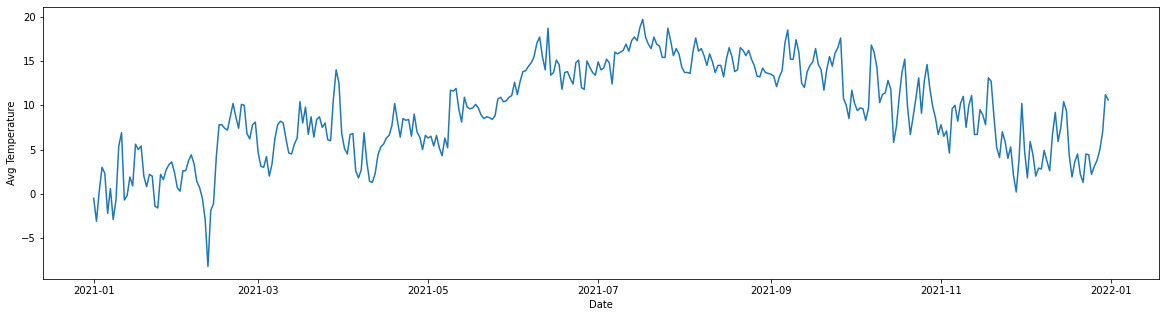

In [5]:
# Plot the average temperature over the year
fig, ax = plt.subplots(1,1,figsize = (20,5))
ax.plot(df_temp['date'], df_temp['avg'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Temperature')

## Binning the temperatures
We want to bin the temperatures so we know what colour to do for each average temperature
- Uniform bins: Take the maximum and minimum temperature and divide the difference by the number of bins 
- Scaled bins: Scale the bins so that each bin has the same number of values and so the colours appear the same number of times in your blanket
- Mums bins (:D): The bins that were recommended from the blog that she was using 
- Best bins: A version of scaled bins, tweaked a little based on preferences

[-8.2  -5.41 -2.62  0.17  2.96  5.75  8.54 11.33 14.12 16.91 19.7 ]


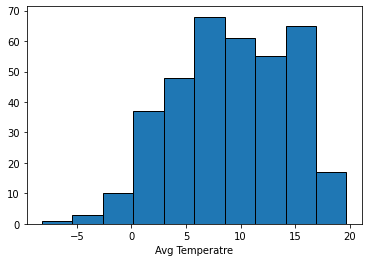

In [6]:
# If you bin uniformly (dividing the range by 10 then you get bins like this)
x = df_temp['avg']
n, uniform_bins, patches = plt.hist(x, 10, edgecolor = 'k')
plt.xlabel('Avg Temperatre')
print(uniform_bins)
# This will result in very few cool colours

[-8.2   2.2   4.4   6.3   7.8   9.4  10.9  13.25 14.5  16.   19.7 ]


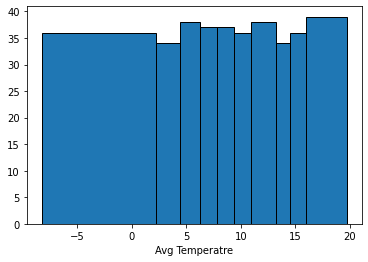

In [7]:
# So we try binning so that the colours will occur the same number of times
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

x = df_temp['avg']
n, bins, patches = plt.hist(x, histedges_equalN(x, 10), edgecolor = 'k')
plt.xlabel('Avg Temperatre')
print(bins)

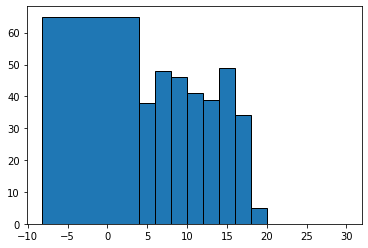

In [8]:
# The bins that the website suggested for mum
mums_bins = [-8.2,4,6,8,10,12,14,16,18,20,30]
n, mums_bins, patches = plt.hist(x, mums_bins, edgecolor = 'k')

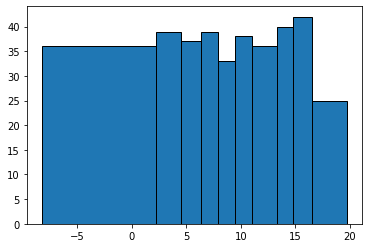

In [9]:
# Possibly the best bins ever (tweak to your hearts desire)
best_bins = [-8.2,   2.2,   4.5,   6.4,   7.9,   9.5,  11.0,  13.35, 14.8,  16.5,   19.7 ]
n, best_bins, patches = plt.hist(x, best_bins, edgecolor = 'k')

## Choosing and sorting the colours
- Choose your colours and get them in hex format and turn them into RGB codes
- If you have chosen too many, like us, then pick your favourite 10
- Sort the colours and display colormap

In [34]:
# We chose 13 colours but only want to use 10, I have put them all here so we can play around with our favs
colour_dic = {'Paper White':'#e9e9ea', #'Paper White':'#ffffff',
              'Duck Egg Blue':'#c8d2e5', 'Spearmint Green':'#8fc996', 
            'Pistachio Green':'#b9bea8','Slate Green':'#63887c',  'Slate Grey':'#8c8587', 
           'Vanilla Cream':'#e6d0b7', 'Light Caramel':'#e1b485', 'Glorious Gold':'#c98023', 
           'Red Wine':'#700421', 'Granite Grey': '#4a4445', 'Elephant Grey':'#bfb8b0',
           'Blush Pink':'#eba5a2'}

# selected_colours = ['Elephant Grey', 'Slate Grey','Granite Grey' ,'Pistachio Green', 'Slate Green', 
#                     'Vanilla Cream', 'Light Caramel', 'Glorious Gold','Blush Pink', 'Red Wine']

selected_colours = ['Duck Egg Blue', 'Elephant Grey', 'Slate Grey','Pistachio Green', 'Slate Green', 
                    'Vanilla Cream', 'Light Caramel', 'Glorious Gold','Blush Pink', 'Red Wine']

# List the selected colours
color_list = [colour_dic[c] for c in selected_colours]
rgb_color_list = [matplotlib.colors.to_rgb(c) for c in color_list]

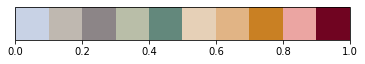

In [35]:
# Sort the colours and display colormap
def get_hsv(hexrgb):
    hexrgb = hexrgb.lstrip("#")   # in case you have Web color specs
    r, g, b = (int(hexrgb[i:i+2], 16) / 255.0 for i in range(0,5,2))
    return colorsys.rgb_to_hsv(r, g, b)


# 0, 1 or 2 to sort by Red, Green or Blue (I like Red)
#rgb_color_list.sort(key=lambda x: x[1]) 

# Or you can sort by hue # Currently not working 
#color_list.sort(key=get_hsv)

# Display colourmap
color_ramp = ListedColormap(rgb_color_list)
fig, ax = plt.subplots(figsize=(6,0.6))
matplotlib.colorbar.ColorbarBase(ax, cmap=color_ramp, orientation = 'horizontal')

## Bin temperatures and simulate blanket

In [36]:
# Bin the temperatures in the dataframe to simulate blanket
df_temp['uniform_bins'] = pd.cut(df_temp['avg'], bins, labels = rgb_color_list, include_lowest=True)
df_temp['scaled_bins'] = pd.cut(df_temp['avg'], uniform_bins, labels = rgb_color_list, include_lowest=True)
df_temp['mums_bins'] = pd.cut(df_temp['avg'], mums_bins, labels = rgb_color_list, include_lowest=True)
df_temp['best_bins'] = pd.cut(df_temp['avg'], best_bins, labels = rgb_color_list, include_lowest=True)

display(df_temp)

,max,avg,min,date,uniform_bins,scaled_bins,mums_bins,best_bins
0,4,-0.5,-5,2021-01-01,"(0.7843137254901961, 0.8235294117647058, 0.898...","(0.5490196078431373, 0.5215686274509804, 0.529...","(0.7843137254901961, 0.8235294117647058, 0.898...","(0.7843137254901961, 0.8235294117647058, 0.898..."
1,2,-3.1,-7,2021-01-02,"(0.7843137254901961, 0.8235294117647058, 0.898...","(0.7490196078431373, 0.7215686274509804, 0.690...","(0.7843137254901961, 0.8235294117647058, 0.898...","(0.7843137254901961, 0.8235294117647058, 0.898..."
2,4,0.3,-7,2021-01-03,"(0.7843137254901961, 0.8235294117647058, 0.898...","(0.7254901960784313, 0.7450980392156863, 0.658...","(0.7843137254901961, 0.8235294117647058, 0.898...","(0.7843137254901961, 0.8235294117647058, 0.898..."
3,4,3.0,2,2021-01-04,"(0.7490196078431373, 0.7215686274509804, 0.690...","(0.38823529411764707, 0.5333333333333333, 0.48...","(0.7843137254901961, 0.8235294117647058, 0.898...","(0.7490196078431373, 0.7215686274509804, 0.690..."
4,4,2.3,-2,2021-01-05,"(0.7490196078431373, 0.7215686274509804, 0.690...","(0.7254901960784313, 0.7450980392156863, 0.658...","(0.7843137254901961, 0.8235294117647058, 0.898...","(0.7490196078431373, 0.7215686274509804, 0.690..."
...,...,...,...,...,...,...,...,...
26,6,3.8,1,2021-12-27,"(0.7490196078431373, 0.7215686274509804, 0.690...","(0.38823529411764707, 0.5333333333333333, 0.48...","(0.7843137254901961, 0.8235294117647058, 0.898...","(0.7490196078431373, 0.7215686274509804, 0.690..."
27,7,5.0,1,2021-12-28,"(0.5490196078431373, 0.5215686274509804, 0.529...","(0.38823529411764707, 0.5333333333333333, 0.48...","(0.7490196078431373, 0.7215686274509804, 0.690...","(0.5490196078431373, 0.5215686274509804, 0.529..."
28,11,7.0,1,2021-12-29,"(0.7254901960784313, 0.7450980392156863, 0.658...","(0.9019607843137255, 0.8156862745098039, 0.717...","(0.5490196078431373, 0.5215686274509804, 0.529...","(0.7254901960784313, 0.7450980392156863, 0.658..."
29,13,11.2,9,2021-12-30,"(0.8823529411764706, 0.7058823529411765, 0.521...","(0.8823529411764706, 0.7058823529411765, 0.521...","(0.38823529411764707, 0.5333333333333333, 0.48...","(0.8823529411764706, 0.7058823529411765, 0.521..."


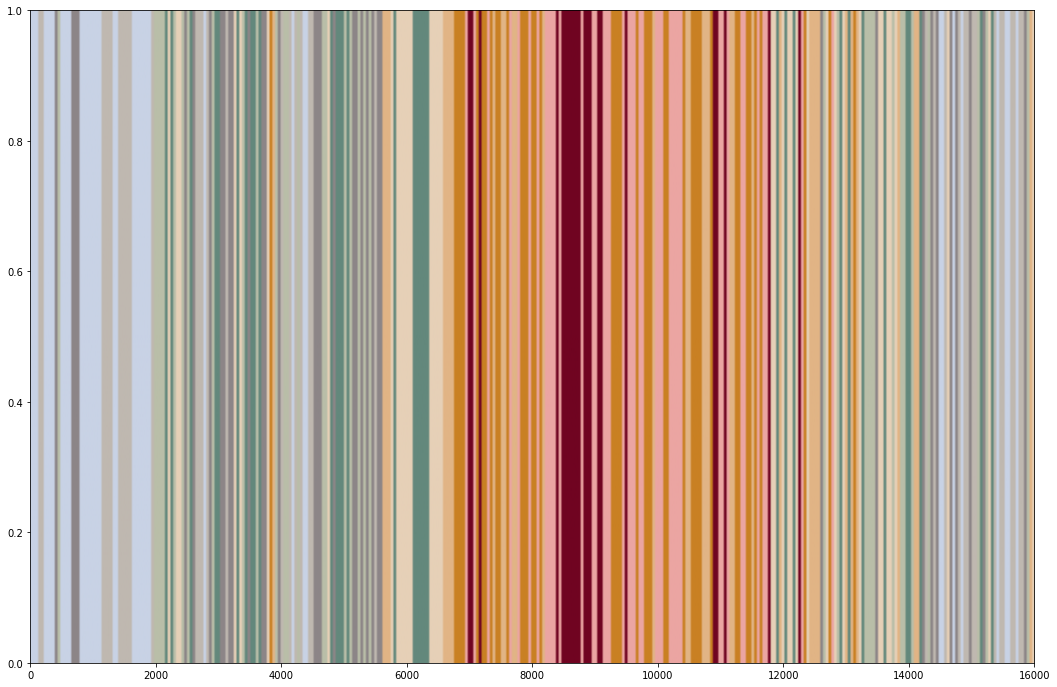

In [37]:
# And display your blanket
column = 'best_bins'

rgb_array = np.array(df_temp[column].values)
rgb_array = np.array([[c[0],c[1],c[2]] for c in rgb_array])
img = np.array(rgb_array).reshape((1, len(rgb_array), 3))

fig, ax = plt.subplots(figsize=(18,12))
plt.imshow(img, extent=[0, 16000, 0, 1], aspect='auto')